In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('classic')
%matplotlib inline

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import os

figdir = "./figures"
if not os.path.exists(figdir):
    os.makedirs(figdir)

# 1. 10-week course

10-week course had 4 exams in total, 3 midterms and 1 final.

## 1.1 Load data file

In [3]:
idx2id = np.loadtxt("./data/10week_idx2id.csv", dtype=int, delimiter="\n")
nclicks_per_day_mat = np.loadtxt("./data/10week_nclicks_per_day_mat.csv", dtype=int, delimiter=",")
nclicks_per_day_mat_thresh = np.loadtxt("./data/10week_nclicks_per_day_mat.csv", dtype=int, delimiter=",")
exam_days = [24, 49, 66, 77]  # defined manually

days_limit = nclicks_per_day_mat.shape[1]
n_students = len(idx2id)
assert n_students == nclicks_per_day_mat.shape[0]

In [4]:
avg_clicks = nclicks_per_day_mat.sum(axis=0) / float(n_students)

## 1.2 Number of overall clicks
### 1.2.1 All clicks on a heatmap

In [20]:
def plot_heatmap(data, xlabel, ylabel, fname, matrix_cmap='Greys', xticks=[], xticklabels=[],
                 xtickposition='bottom', xlabelposition='bottom',
                 col_cmap='nipy_spectral', label_fontsize=12, figsize=(7,7)):
    
    fig, axmat = plt.subplots(figsize=figsize)

    im = axmat.matshow(data, interpolation='nearest', aspect='auto', cmap=matrix_cmap)
    axmat.set_xticks(xticks)
    axmat.set_xticklabels(xticklabels, fontsize=12)
    # axmat.set_xticks(rotation=-45, fontsize=8)

    axmat.set_yticks([])
    axmat.yaxis.set_label_position('left')
    # axmat.set_yticklabels(range(data.shape[0]))

    axmat.xaxis.set_ticks_position(xtickposition)
    axmat.xaxis.set_label_position(xlabelposition)
    axmat.set_xlabel(xlabel, labelpad=10, fontsize=label_fontsize)
    axmat.set_ylabel(ylabel, labelpad=10, fontsize=label_fontsize)
    axmat.grid(color='grey', b='on', which='minor', axis='both', linestyle='-')
   
    plt.savefig(fname, bbox_inches='tight')

In [6]:
# Create a version with maximum value 150 
nclicks_per_day_mat_thresh[nclicks_per_day_mat > 150] = 150

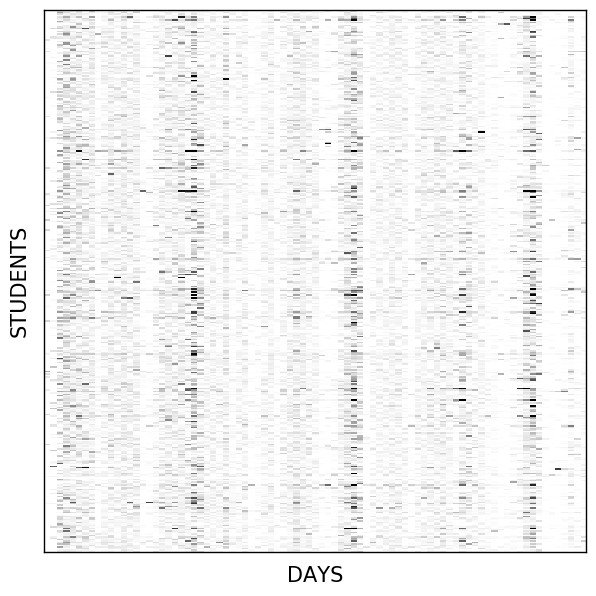

In [7]:
plot_heatmap(nclicks_per_day_mat_thresh, xlabel="DAYS", ylabel="STUDENTS",
              fname=os.path.join(figdir, '10week_all_click_data_heatmap.pdf'),
              label_fontsize=15, figsize=(7,7))

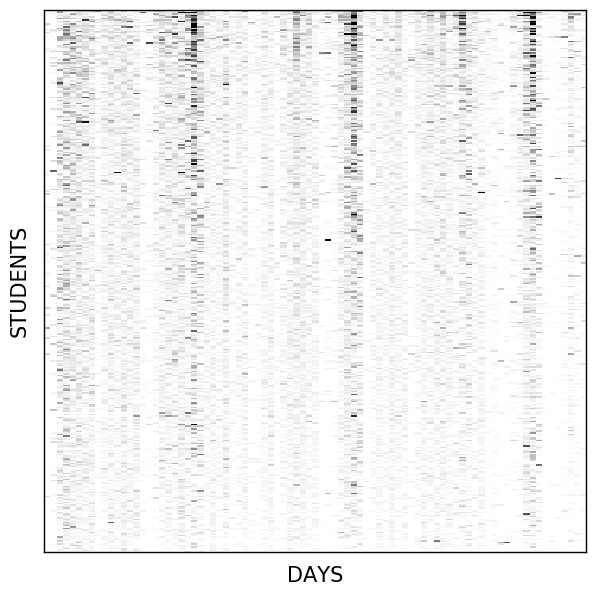

In [8]:
# same plot, sorted
nclicks_sorted = nclicks_per_day_mat_thresh[np.argsort(nclicks_per_day_mat_thresh.sum(axis=1))[::-1],:]
plot_heatmap(nclicks_sorted, xlabel="DAYS", ylabel="STUDENTS",
              fname=os.path.join(figdir, '10week_all_click_data_heatmap_sorted.pdf'),
              label_fontsize=15, figsize=(7,7))

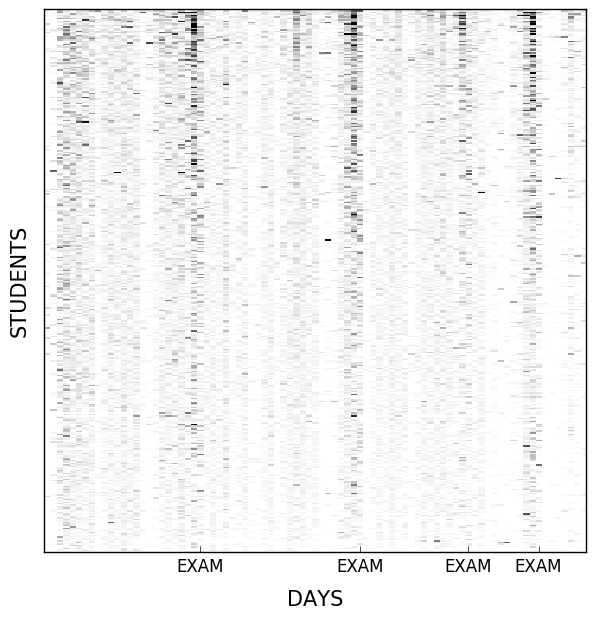

In [10]:
# same plot, sorted, with weekday ticks
nclicks_sorted = nclicks_per_day_mat_thresh[np.argsort(nclicks_per_day_mat_thresh.sum(axis=1))[::-1],:]
plot_heatmap(nclicks_sorted, xlabel="DAYS", ylabel="STUDENTS",
             xticks=exam_days, xticklabels=["EXAM"]*4,
              fname=os.path.join(figdir, '10week_all_click_data_heatmap_sorted_examticks.pdf'),
              label_fontsize=15, figsize=(7,7))

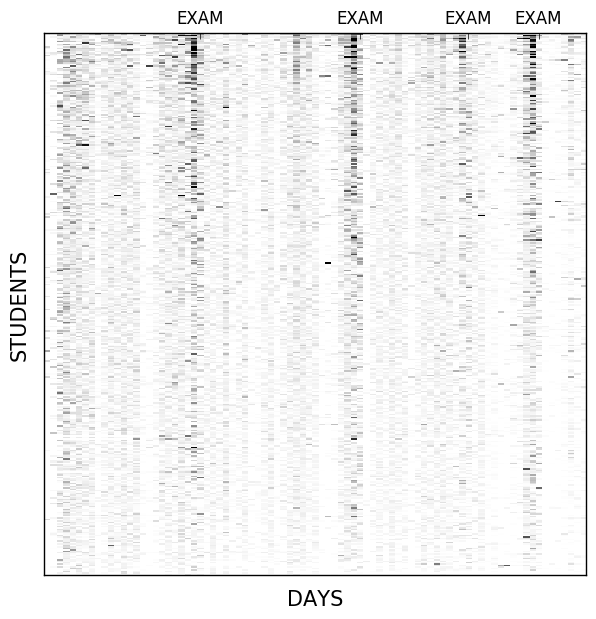

In [21]:
# same plot, sorted, with weekday ticks
nclicks_sorted = nclicks_per_day_mat_thresh[np.argsort(nclicks_per_day_mat_thresh.sum(axis=1))[::-1],:]
plot_heatmap(nclicks_sorted, xlabel="DAYS", ylabel="STUDENTS",
             xticks=exam_days, xticklabels=["EXAM"]*4, xtickposition='top',
              fname=os.path.join(figdir, '10week_all_click_data_heatmap_sorted_examticks_top.pdf'),
              label_fontsize=15, figsize=(7,7))

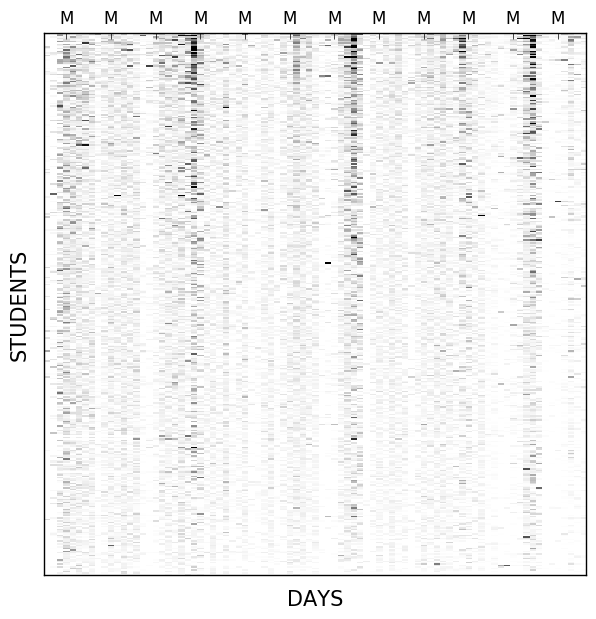

In [22]:
# same plot, sorted, with weekday ticks
mondays = range(3, days_limit, 7)
nclicks_sorted = nclicks_per_day_mat_thresh[np.argsort(nclicks_per_day_mat_thresh.sum(axis=1))[::-1],:]
plot_heatmap(nclicks_sorted, xlabel="DAYS", ylabel="STUDENTS",
             xticks=mondays, xticklabels=["M"]*len(mondays), xtickposition='top',
              fname=os.path.join(figdir, '10week_all_click_data_heatmap_sorted_monticks.pdf'),
              label_fontsize=15, figsize=(7,7))

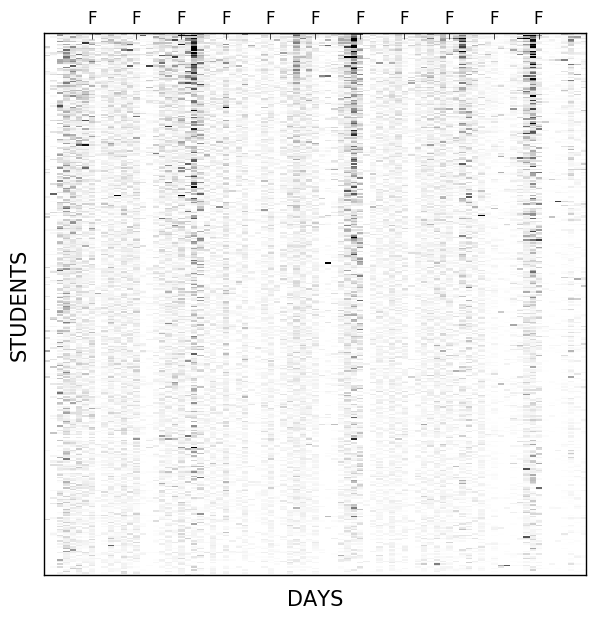

In [25]:
# same plot, sorted, with weekday ticks
mondays = range(7, days_limit-3, 7)
nclicks_sorted = nclicks_per_day_mat_thresh[np.argsort(nclicks_per_day_mat_thresh.sum(axis=1))[::-1],:]
plot_heatmap(nclicks_sorted, xlabel="DAYS", ylabel="STUDENTS",
             xticks=mondays, xticklabels=["F"]*len(mondays), xtickposition='top',
              fname=os.path.join(figdir, '10week_all_click_data_heatmap_sorted_friticks.pdf'),
              label_fontsize=15, figsize=(7,7))

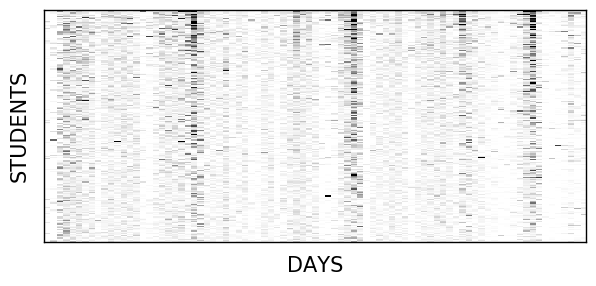

In [10]:
# part of the data, sorted
# same plot, sorted
plot_heatmap(nclicks_sorted[:200], xlabel="DAYS", ylabel="STUDENTS",
              fname=os.path.join(figdir, '10week_all_click_data_heatmap_sorted_200only.pdf'),
              label_fontsize=15, figsize=(7,3))

### 1.2.2 Average number of clicks per day by students -- Barplot with exam lines

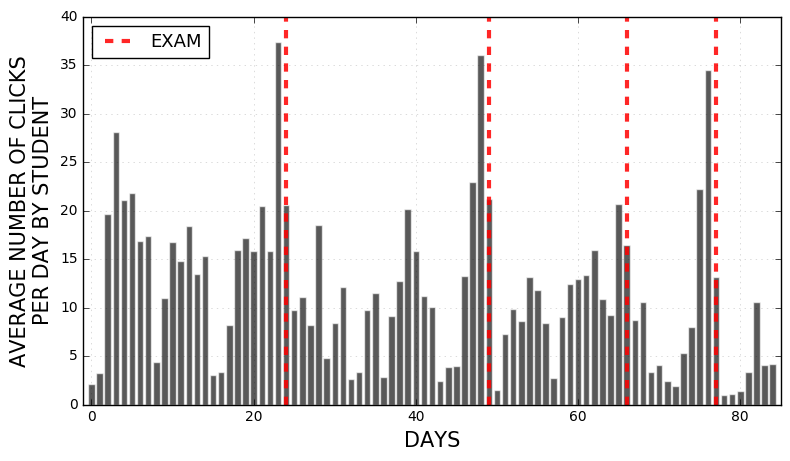

In [11]:
fname = os.path.join(figdir, '10week_clickstream_barplot_with_lines.pdf')

fig, ax = plt.subplots(figsize=(9,5))
ax.grid(alpha=0.2, axis='both')
for exdays in exam_days[:-1]:
    ax.axvline(x=exdays, alpha=0.85, color='red', linewidth=3, linestyle='--')
ax.axvline(x=exam_days[-1], alpha=0.85, color='red', linewidth=3, linestyle='--', label='Exam'.upper())

ax.bar(range(85), avg_clicks[:days_limit], 0.8, alpha=0.65, align='center', color='black', edgecolor='white')
ax.legend(loc='upper left', fontsize=13)
ax.set_xlim(-1,85)
ax.set_xlabel('DAYS', fontsize=15)
ax.set_ylabel('AVERAGE NUMBER OF CLICKS\nPER DAY BY STUDENT', fontsize=15)
plt.savefig(fname, bbox_inches='tight')

### Without lines

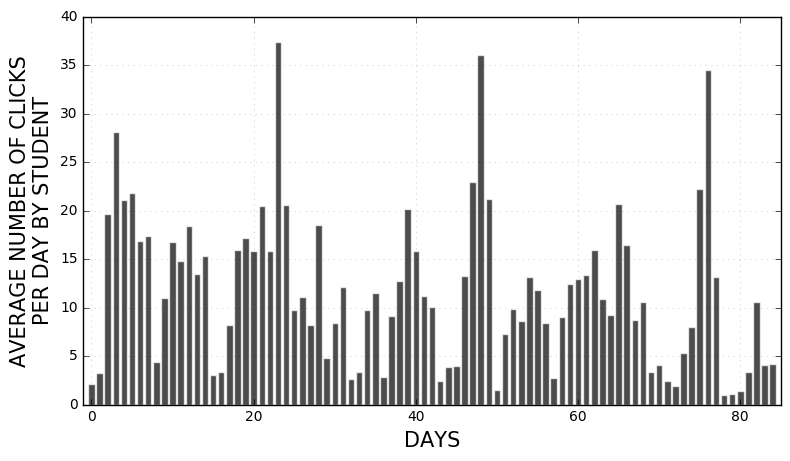

In [12]:
fname = os.path.join(figdir, '10week_clickstream_barplot.pdf')

fig, ax = plt.subplots(figsize=(9,5))
ax.grid(alpha=0.2, axis='both')
ax.bar(range(85), avg_clicks[:days_limit], 0.8, alpha=0.7, align='center', color='black', edgecolor='white')
ax.set_xlim(-1,85)
ax.set_xlabel('DAYS', fontsize=15)
ax.set_ylabel('AVERAGE NUMBER OF CLICKS\nPER DAY BY STUDENT', fontsize=15)
plt.savefig(fname, bbox_inches='tight')

# 2. 5-week online course

5-week online course had deadlines on Fridays for watching lecture videos and submitting daily quizzes for a given week.
<br>Also, it had quizzes every Wednesday and Friday.

## 2.1 Load data file

In [13]:
# loading files
# Mapping from index to random IDs
idx2id5 = np.loadtxt("./data/5week_idx2id.csv", dtype=int, delimiter="\n")
# Number of all video clicks per day
nclicks_per_day_mat5 = np.loadtxt("./data/5week_nclicks_per_day_mat.csv", dtype=int, delimiter=",")
# Number of first video clicks per day (each student will have <= 25 clicks)
first_clicks_per_day_mat5 = np.loadtxt("./data/5week_first_clicks_per_day_mat.csv", dtype=int, delimiter=",")

# some important days as indexes
fridays = np.arange(11, 44, 7)
weddays = np.arange(9, 44, 7)
mondays = np.arange(7, 44, 7)
sundays = np.arange(13, 44, 7)
final = 44

days_limit5 = nclicks_per_day_mat5.shape[1]
n_students5 = len(idx2id5)
assert n_students5 == nclicks_per_day_mat5.shape[0]

## 2.2 Number of FIRST VIDEO CLICKS per day
### 2.2.1 All first click data on a heatmap

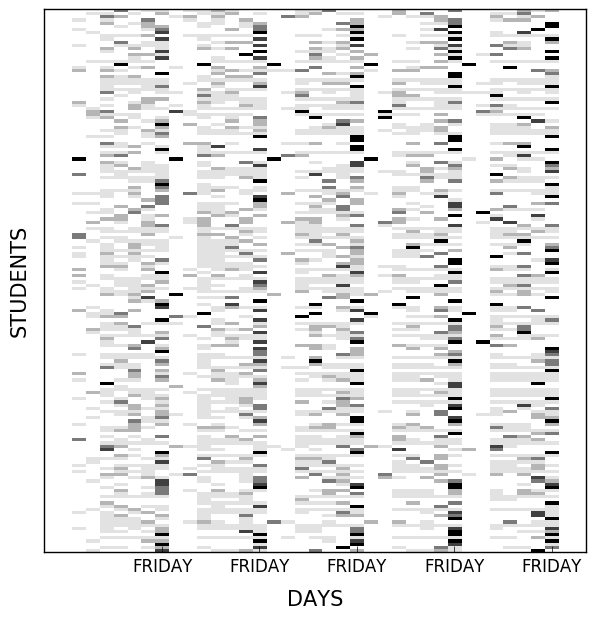

In [14]:
start=3
end=42
plot_heatmap(first_clicks_per_day_mat5[:,start:end], xlabel="DAYS", ylabel="STUDENTS", 
             xticks=fridays-start, xticklabels=["FRIDAY"]*5,
              fname=os.path.join(figdir, '5week_first_click_data_heatmap.pdf'),
              label_fontsize=15, figsize=(7,7))

### 2.2.2 Aggregated barplot with lines

Friday: deadline for watching daily videos and submitting daily quizzes

In [15]:
avg_clicks_first = first_clicks_per_day_mat5.sum(axis=0) / float(first_clicks_per_day_mat5.shape[0])

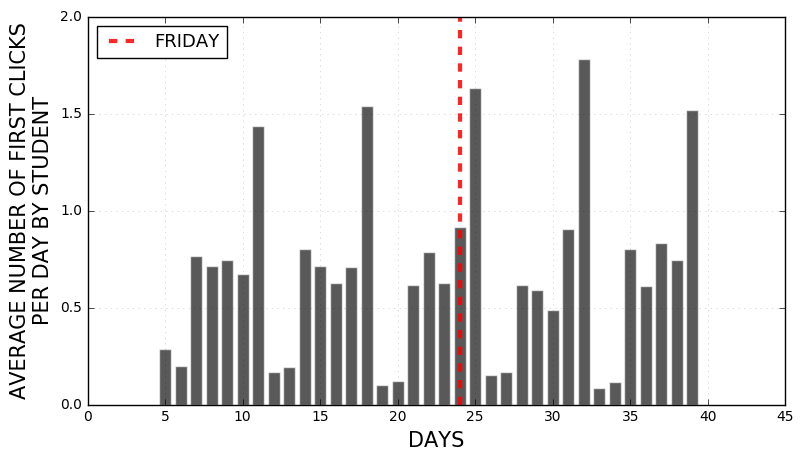

In [16]:
fname = os.path.join(figdir, '5week_first_clickstream_barplot_with_lines.pdf')

fig, ax = plt.subplots(figsize=(9,5))
ax.grid(alpha=0.2, axis='both')

# Lines
for exdays in exam_days[:-1]:
    ax.axvline(x=exdays, alpha=0.85, color='red', linewidth=3, linestyle='--')
ax.axvline(x=exam_days[-1], alpha=0.85, color='red', linewidth=3, linestyle='--', label='FRIDAY'.upper())

# Bar plot
ax.bar(range(days_limit5), avg_clicks_first[:days_limit5], 0.8, alpha=0.65, align='center', color='black', edgecolor='white')
ax.legend(loc='upper left', fontsize=13)

ax.set_xlim(0,45)
ax.set_ylim(0, 2)
ax.set_xlabel('DAYS', fontsize=15)
ax.set_ylabel('AVERAGE NUMBER OF FIRST CLICKS\nPER DAY BY STUDENT', fontsize=15)
plt.savefig(fname, bbox_inches='tight')

## 2.3 ALL video clicks (not the first clicks!)

### 2.3.1 All data on a heatmap


Wednesday and Sunday: challenge quizzes<br>
Friday: deadline for watching daily videos and submitting daily quizzes

In [17]:
nclicks_per_day_mat5_thresh = nclicks_per_day_mat5[:]
nclicks_per_day_mat5_thresh[nclicks_per_day_mat5 > 100] = 100

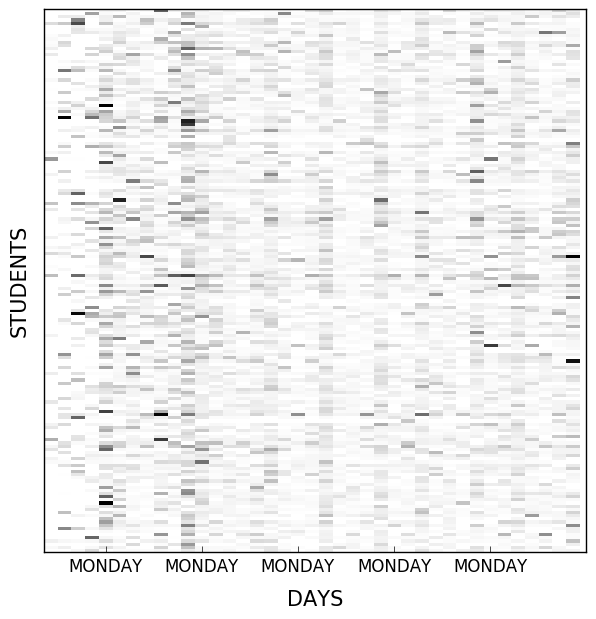

In [18]:
start=3
end=42
plot_heatmap(nclicks_per_day_mat5_thresh[:,start:end], xlabel="DAYS", ylabel="STUDENTS", 
             xticks=mondays-start, xticklabels=["MONDAY"]*5,
              fname=os.path.join(figdir, '5week_all_click_data_heatmap.pdf'),
              label_fontsize=15, figsize=(7,7))

### 2.3.2 Aggregated barplot with lines

Wednesday and Sunday: challenge quizzes<br>
Friday: deadline for watching daily videos and submitting daily quizzes

In [19]:
avg_clicks = nclicks_per_day_mat5.sum(axis=0) / float(nclicks_per_day_mat5.shape[0])

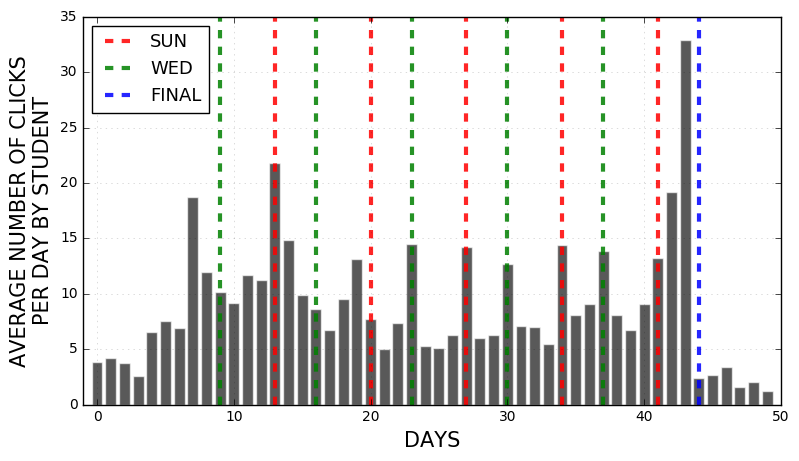

In [20]:
fname = os.path.join(figdir, '5week_clickstream_barplot_with_lines.pdf')

fig, ax = plt.subplots(figsize=(9,5))
ax.grid(alpha=0.2, axis='both')

# Lines (comment the below lines if not needed)
# sundays
for exdays in sundays[:-1]:
    ax.axvline(x=exdays, alpha=0.85, color='red', linewidth=3, linestyle='--')
ax.axvline(x=sundays[-1], alpha=0.85, color='red', linewidth=3, linestyle='--', label='SUN'.upper())
# wednesdays
for exdays in weddays[:-1]:
    ax.axvline(x=exdays, alpha=0.85, color='green', linewidth=3, linestyle='--')
ax.axvline(x=weddays[-1], alpha=0.85, color='green', linewidth=3, linestyle='--', label='WED'.upper())
# Final exam
ax.axvline(x=final, alpha=0.85, color='blue', linewidth=3, linestyle='--', label='FINAL'.upper())
ax.legend(loc='upper left', fontsize=13)


# Bar plot
ax.bar(range(days_limit5), avg_clicks[:days_limit5], 0.8, alpha=0.65, align='center', color='black', edgecolor='white')
ax.set_xlim(-1,days_limit5)
ax.set_xlabel('DAYS', fontsize=15)
ax.set_ylabel('AVERAGE NUMBER OF CLICKS\nPER DAY BY STUDENT', fontsize=15)
plt.savefig(fname, bbox_inches='tight')